In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Retrieve chart from TV

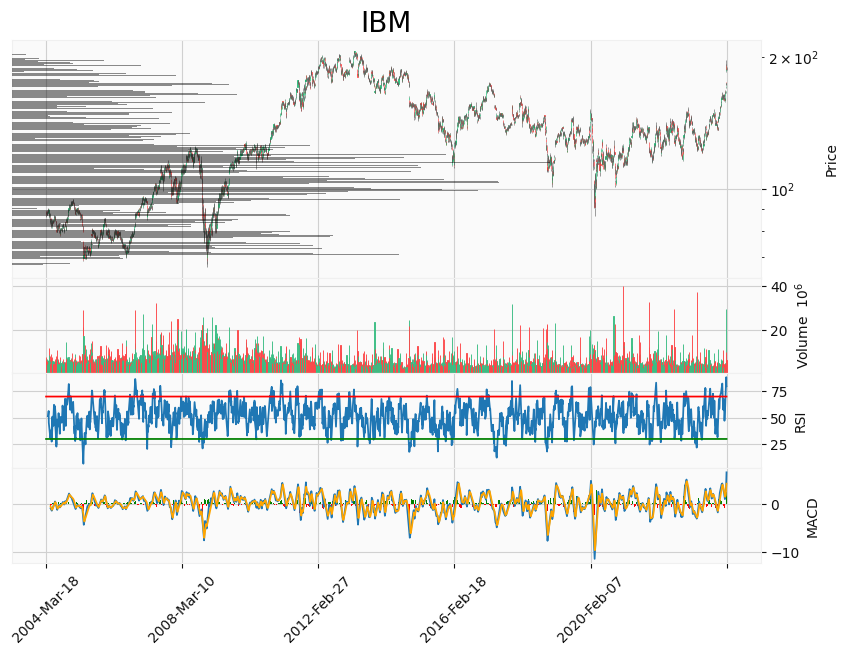

In [10]:
from stockMarket.core import Technicals

contract = Technicals(ticker="IBM")
contract.init_pricing_data(n_bars=5000)
rsi = contract.rsi()
macd = contract.macd()
contract.plot(rsi=rsi, macd=macd, logarithmic_scale="log")

you are using nologin method, data you access may be limited


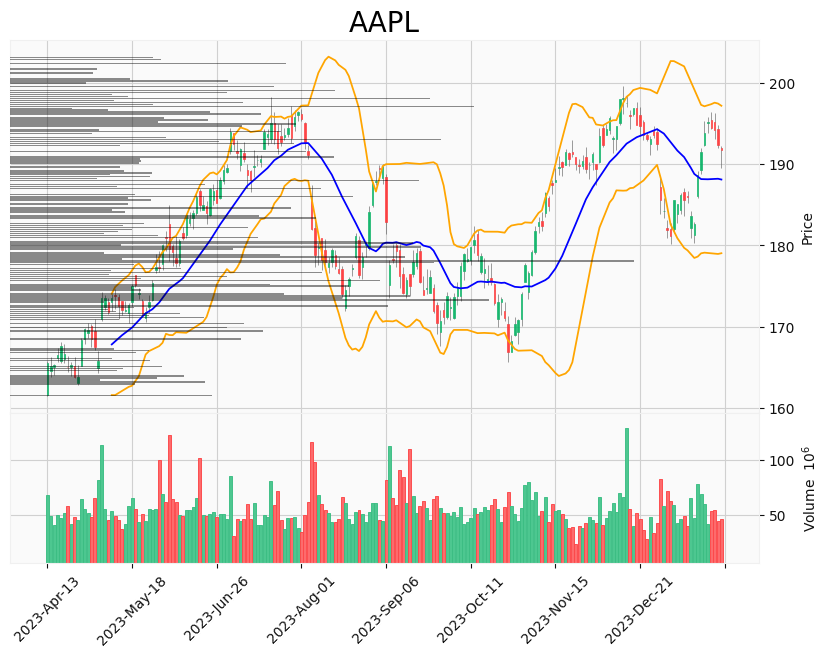

In [4]:
from stockMarket.core import Technicals

contract = Technicals(ticker="AAPL")
contract.init_pricing_data(interval="daily", n_bars=200)
bbands = contract.bbands()
contract.plot(bbands=bbands)



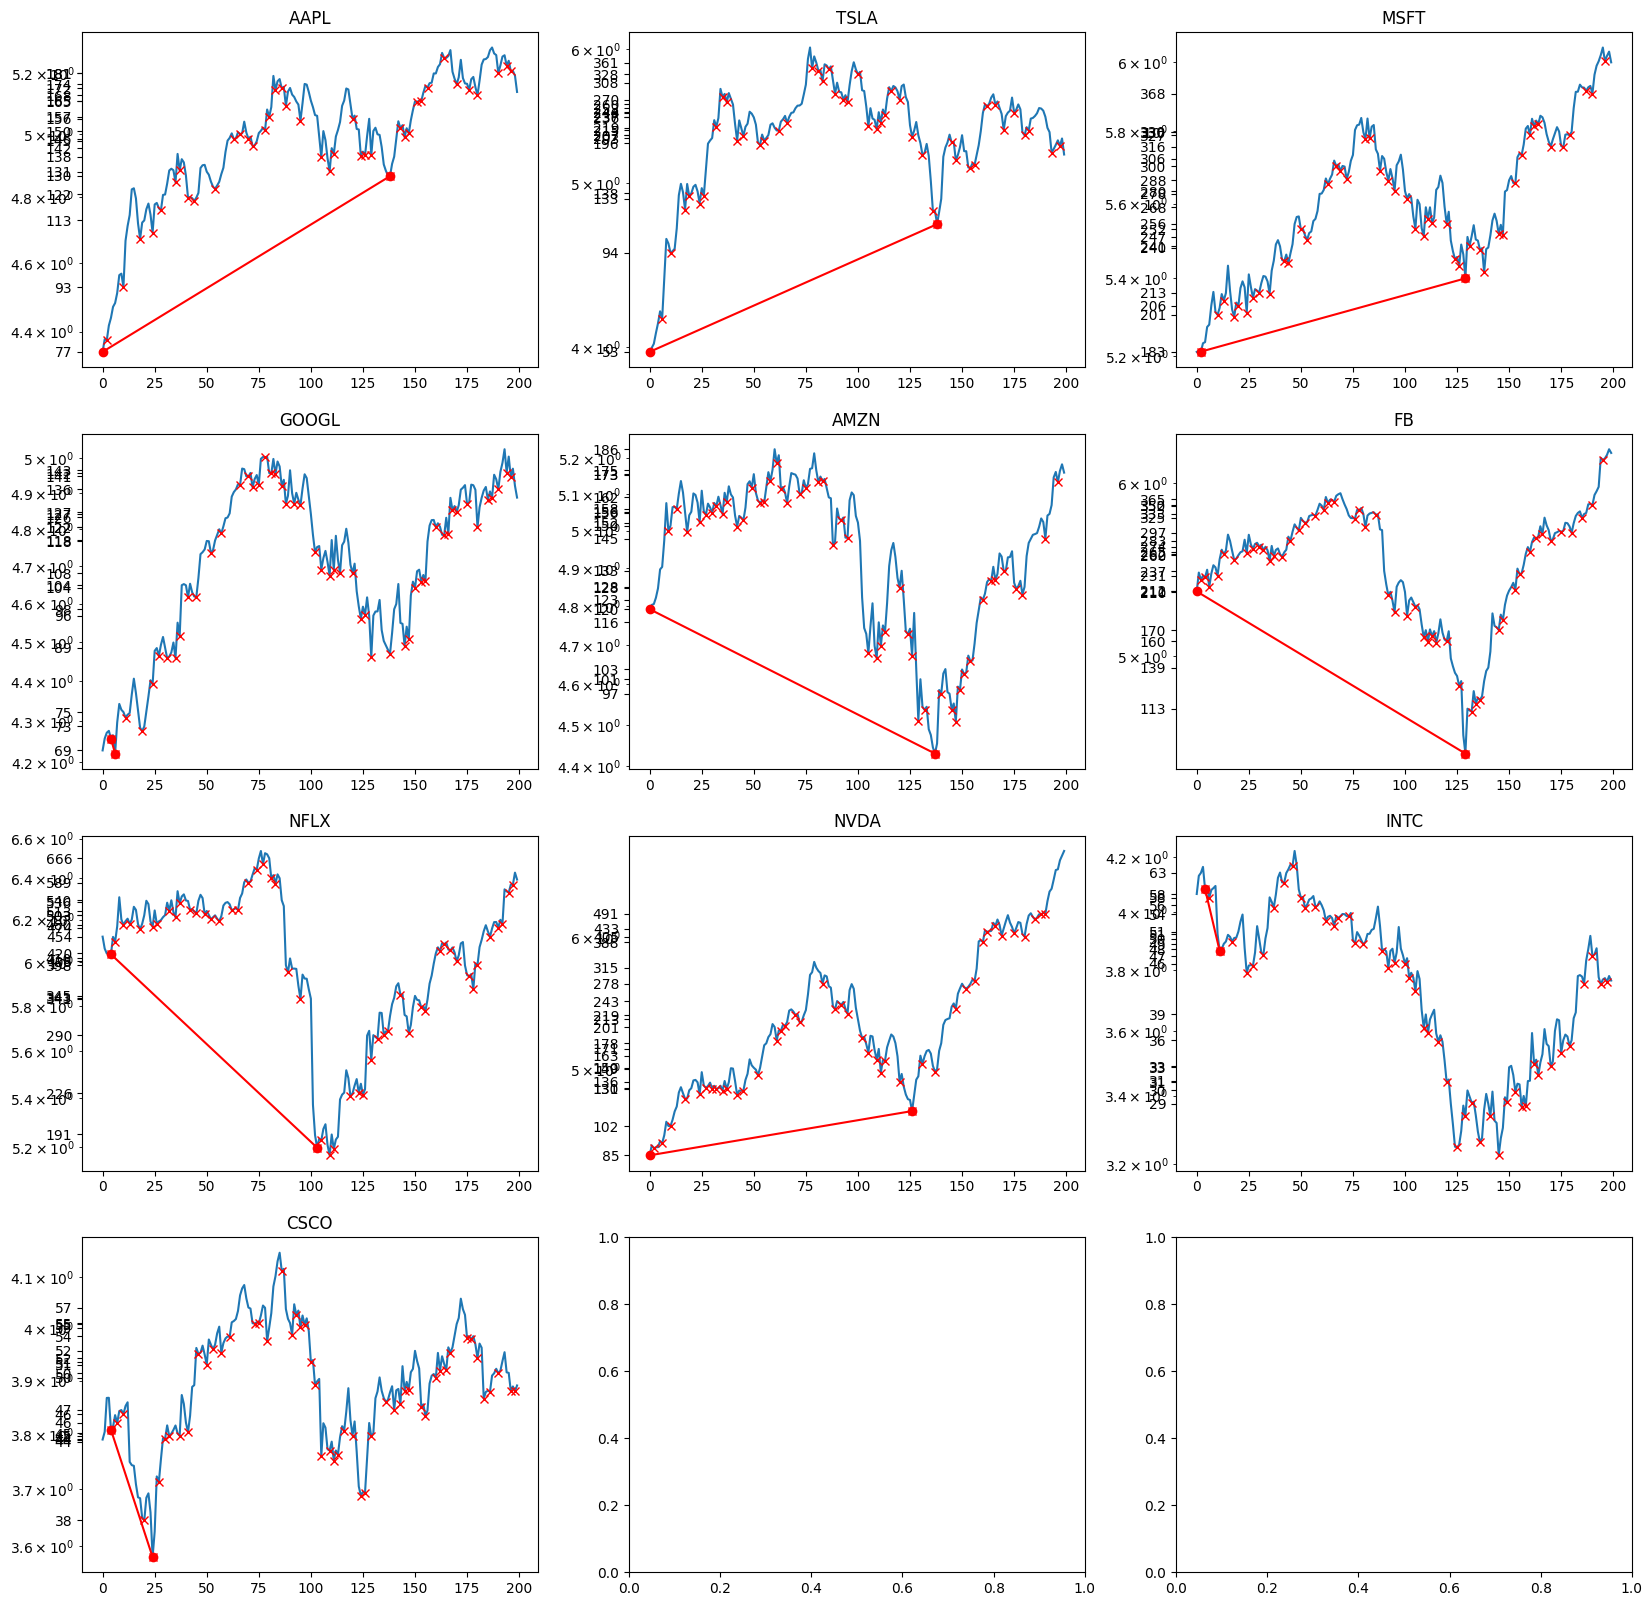

In [90]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import argrelextrema
from matplotlib.ticker import FixedLocator

from stockMarket.core import Technicals

tickers = ["AAPL", "TSLA", "MSFT", "GOOGL", "AMZN", "FB", "NFLX", "NVDA", "INTC", "CSCO"]

n_rows = int(np.ceil(len(tickers) / 3))

fig, ax = plt.subplots(n_rows, 3, figsize=(20, 20))

for n_ticker, ticker in enumerate(tickers):
    contract = Technicals(ticker=ticker)
    contract.init_pricing_data(interval="weekly", n_bars=200)
    
    log_close = np.log(contract.pricing_data.close.values)
    index_minima = argrelextrema(log_close, np.less)[0]

    first_minimum_index = 0
    if index_minima[0] == 0:
        first_minimum_index = 0
    else:
        if (log_close[index_minima[0]] - log_close[0]) / index_minima[0] < 0.01: # check 0.1
            first_minimum_index = index_minima[0]
        else:
            first_minimum_index = 0
            
    first_minimum = log_close[first_minimum_index]

    true_min = []
    for index in index_minima[1:]:
        value = log_close[index]
        k = (value - first_minimum) / (index - first_minimum_index)
        if all(close >= k * i + first_minimum for i, close in enumerate(log_close[first_minimum_index:])):
            true_min.append(index)

    ax_x = n_ticker // 3
    ax_y = n_ticker % 3
    
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    #transfrom all y-axis to log scale and make np.exp() of y-axis
    ax[ax_x,ax_y].set_yscale('log')
    #change now the y-axis ticks to show the real values
    min_close = np.exp(log_close.min())
    max_close = np.exp(log_close.max())
    delta = max_close - min_close
    ax[ax_x,ax_y].set_yticks([log_close[i] for i in range(0, len(log_close), 10)], [f"{np.exp(log_close[i]):.0f}" for i in range(0, len(log_close), 10)])
    ax[ax_x,ax_y].set_title(ticker)

    ax[ax_x,ax_y].plot(log_close)
    ax[ax_x,ax_y].plot(first_minimum_index, first_minimum, 'ro')
    for index in index_minima:
        ax[ax_x,ax_y].plot(index, log_close[index], 'rx')
    for index in true_min:
        ax[ax_x,ax_y].plot(index, log_close[index], 'ro')
    ax[ax_x,ax_y].plot([first_minimum_index, true_min[0]], [first_minimum, log_close[true_min[0]]], 'r-')
    
